# UNCC HW 6 
# Andrew Kling
## Observable Trends:
#### 1.  There is noticeable  correlation between the latitude of a city and its temperature.  Cities with latitudes between 20-40 degrees North have a higher temperature than anywhere else.  
#### 2. Humidity does not correlate as strongly as temperature but there is a noticable trend at near latitude 0, where the humidity spikes drastically.
#### 3. Wind speed has less correlation as well but also there is a noticable grouping of cities near latitiude 20 North that all have wind speeds grouped near 20 mph.

In [3]:
#Andrew Kling
#UNCC HW#6

import os
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy 
import numpy as np
import random
import requests
import json
import openweathermapy.core as owm
from time import sleep

from config import api_key

settings = {"units":"imperial","appid":api_key}
outputFile = "city_weather_data.csv"

## Import Cities 

In [4]:
#Create list of 500 cities based on closest location to random lat and lon values selected to be close to land
# 
# Latitudes:  180 Degrees West & 180 Degrees East
# Longitudes: Since the extreme North and South have almost zero inhabitants we will just search 
#             between 80 degrees N and 60 degrees S

cities=[]
countries=[]
latitudes=[]
longitudes=[]
current_city = ""

#get initial city
current_lat = random.randint(-180,180)
current_lon = random.randint(-60,80)
current_city = citipy.nearest_city(current_lat, current_lon)
current_city_name = current_city.city_name
cities.append(current_city_name)
countries.append(current_city.country_code)
latitudes.append(current_lat)
longitudes.append(current_lon)
n=1

#loop over 700 cities.  After experimentation this is enough to allow for the weather API to miss
#some cities and still have over 500 in the final results
for i in range(700):
    #if city is already in list we will keep looping until it is a new city
    while current_city_name in cities:
        current_lat = random.randint(-180,180)
        current_lon = random.randint(-60,80)
        current_city = citipy.nearest_city(current_lat, current_lon)
        current_city_name = current_city.city_name
    n=n+1
    cities.append(current_city_name)
    countries.append(current_city.country_code)
    latitudes.append(current_lat)
    longitudes.append(current_lon)
    
cities_df = pd.DataFrame({"City":cities,
                        "Country":countries,
                        "Latitude":latitudes,
                        "Longitude":longitudes})

cities_df.head()


,City,Country,Latitude,Longitude
0,ponta do sol,cv,20,-30
1,ushuaia,ar,-174,-37
2,kruisfontein,za,-161,37
3,nalut,ly,32,11
4,barentsburg,sj,175,-7


## Utilize API to Get City Weather

In [5]:
#Can only make 60 calls per minute...we'll need to slow our requests down! Every 58 calls we sleep for 70 seconds
n=0 # to determine API sleep calls
counter=0 #to display for number of correct city weather pulls
cities_df["Temperature"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""
for index, row in cities_df.iterrows():
    city_country = row["City"] + "," + row["Country"]
    try:
        data = owm.get_current(city_country,**settings)
        print(f'#{counter}: Data for {row["City"]},{row["Country"]} retrieved!')
        cities_df.loc[index, "Temperature"] = float(data["main"]["temp"])
        cities_df.loc[index, "Humidity"] = float(data["main"]["humidity"])
        cities_df.loc[index, "Cloudiness"] = float(data["clouds"]["all"])
        cities_df.loc[index, "Wind Speed"] = float(data["wind"]["speed"])
        cities_df.loc[index, "Latitude"] = float(data["coord"]["lat"])
        cities_df.loc[index, "Longitude"] = float(data["coord"]["lon"])
        n +=1
        counter+=1
        
    except:
        print(f'Could not retrieve {row["City"]},{row["Country"]}')
        #delete row of city we could not retrieve
        cities_df.drop(index, inplace=True)
        n+=1
    
    if n % 58 == 0:
        print("Waiting on API...")
        sleep(70)
        print("Resuming!")



#0: Data for ponta do sol,cv retrieved!
#1: Data for ushuaia,ar retrieved!
#2: Data for kruisfontein,za retrieved!
#3: Data for nalut,ly retrieved!
Could not retrieve barentsburg,sj
#4: Data for victoria,sc retrieved!
Could not retrieve kalomo,zm
#5: Data for narsaq,gl retrieved!
#6: Data for longyearbyen,sj retrieved!
#7: Data for cape town,za retrieved!
#8: Data for qaanaaq,gl retrieved!
#9: Data for hermanus,za retrieved!
#10: Data for nouakchott,mr retrieved!
#11: Data for bredasdorp,za retrieved!
#12: Data for port elizabeth,za retrieved!
Could not retrieve jyvaskyla,fi
Could not retrieve taolanaro,mg
#13: Data for tasiilaq,gl retrieved!
#14: Data for mahebourg,mu retrieved!
#15: Data for dikson,ru retrieved!
#16: Data for aksarayskiy,ru retrieved!
#17: Data for tiznit,ma retrieved!
#18: Data for port alfred,za retrieved!
#19: Data for skibbereen,ie retrieved!
#20: Data for itupiranga,br retrieved!
#21: Data for igurubi,tz retrieved!
Could not retrieve belushya guba,ru
#22: Data f

#188: Data for pelym,ru retrieved!
#189: Data for marovoay,mg retrieved!
Could not retrieve toliary,mg
#190: Data for santo antonio do sudoeste,br retrieved!
#191: Data for likasi,cd retrieved!
#192: Data for takoradi,gh retrieved!
#193: Data for sabha,ly retrieved!
#194: Data for gornopravdinsk,ru retrieved!
#195: Data for umea,se retrieved!
#196: Data for nanortalik,gl retrieved!
#197: Data for benghazi,ly retrieved!
Could not retrieve gat,ly
#198: Data for luangwa,zm retrieved!
#199: Data for kembe,cf retrieved!
#200: Data for bonavista,ca retrieved!
#201: Data for kutum,sd retrieved!
Could not retrieve saryshagan,kz
#202: Data for manturovo,ru retrieved!
#203: Data for cervo,es retrieved!
#204: Data for yeroham,il retrieved!
#205: Data for novopokrovka,ru retrieved!
#206: Data for castrillon,es retrieved!
#207: Data for dasoguz,tm retrieved!
#208: Data for ahar,ir retrieved!
#209: Data for adrar,dz retrieved!
#210: Data for camacha,pt retrieved!
#211: Data for canico,pt retrieved!


#374: Data for darnah,ly retrieved!
#375: Data for buciumi,ro retrieved!
#376: Data for aksu,cn retrieved!
#377: Data for tazovskiy,ru retrieved!
#378: Data for argentan,fr retrieved!
#379: Data for viseu,br retrieved!
#380: Data for kabalo,cd retrieved!
#381: Data for omboue,ga retrieved!
#382: Data for amalner,in retrieved!
#383: Data for olinda,br retrieved!
Could not retrieve kristiinankaupunki,fi
#384: Data for aktau,kz retrieved!
#385: Data for chany,ru retrieved!
#386: Data for robertsport,lr retrieved!
#387: Data for saint-augustin,ca retrieved!
#388: Data for praia,cv retrieved!
#389: Data for gobabis,na retrieved!
Could not retrieve barawe,so
#390: Data for chitipa,mw retrieved!
#391: Data for mahajanga,mg retrieved!
#392: Data for bosaso,so retrieved!
#393: Data for lyuban,ru retrieved!
#394: Data for araxa,br retrieved!
#395: Data for buchanan,lr retrieved!
#396: Data for nouadhibou,mr retrieved!
#397: Data for pennagaram,in retrieved!
#398: Data for burriana,es retrieved!


In [21]:
#reset index of dataframe after dropping empty rows
cities_df = cities_df.reset_index(drop=True)


## City Latitude vs Temperature (F)

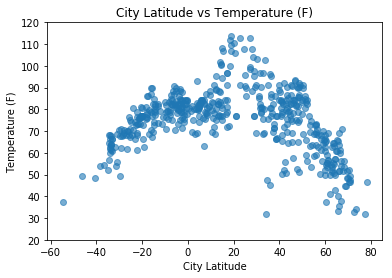

In [46]:
#city longitude vs temp plot
plt.scatter(cities_df["Latitude"],cities_df["Temperature"], alpha=.6)
plt.title("City Latitude vs Temperature (F)")
plt.xlabel("City Latitude")
plt.ylabel("Temperature (F)")
plt.xticks(np.arange(-60,100,20))
plt.yticks(np.arange(20,130,10))
plt.savefig("lat_vs_temp.png")
plt.show()


## City Latitude vs Humidity (%)

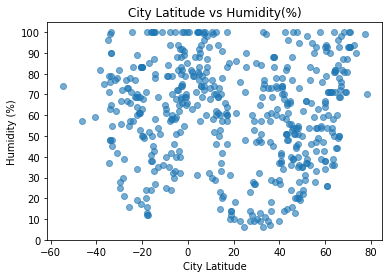

In [47]:
plt.scatter(cities_df["Latitude"],cities_df["Humidity"], alpha=.6)
plt.title("City Latitude vs Humidity(%)")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.xticks(np.arange(-60,100,20))
plt.yticks(np.arange(0,110,10))
plt.savefig("lat_vs_humidity.png")
plt.show()

## City Latitude vs Cloudiness (%)

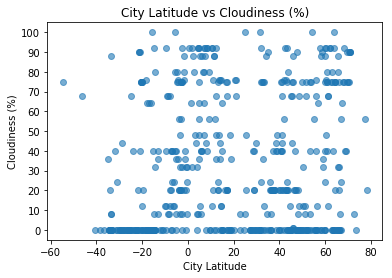

In [49]:
plt.scatter(cities_df["Latitude"],cities_df["Cloudiness"], alpha=.6)
plt.title("City Latitude vs Cloudiness (%)")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.xticks(np.arange(-60,100,20))
plt.yticks(np.arange(0,110,10))
plt.savefig("lat_vs_cloudiness.png")
plt.show()

## City Latitude vs Wind Speed (mph)

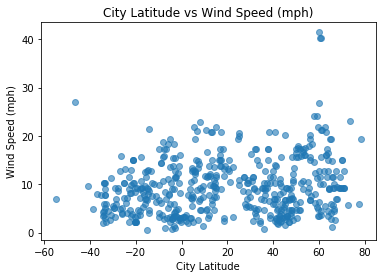

In [52]:
plt.scatter(cities_df["Latitude"],cities_df["Wind Speed"], alpha=.6)
plt.title("City Latitude vs Wind Speed (mph)")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xticks(np.arange(-60,100,20))
plt.yticks(np.arange(0,50,10))
plt.savefig("lat_vs_wind_speed.png")
plt.show()